### Pit Stop Data Analysis

https://github.com/CS418/group-project-team-import-antigravity

For analyzing the pit stop data, we will determine how the duration of a pit stop effects how the overall lap went. To get a small glipse of the data, we will only use one race.

First we will get the data form pit_times and lap_times, and combine both dataframes pandas. We first need to rename some columns from our pit database so the merge doesn't appear confusing.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data/pit_stops.csv")
df2 = pd.read_csv("data/lap_times.csv")

df2 = df2.loc[df2['raceId'] == 841]
df = df.loc[df['raceId'] == 841]

df.rename(columns = {'lap':'pit_lap', 'time':'pit_time', 'milliseconds':'pit_ms'}, inplace = True)

print(df.head(5))
print(df2.head(5))

dfmain = pd.merge(df,df2, on = 'driverId', how = 'inner')
dfmain.drop('raceId_y', axis = 1, inplace = True)
dfmain



   raceId  driverId  stop  pit_lap  pit_time duration  pit_ms
0     841       153     1        1  17:05:23   26.898   26898
1     841        30     1        1  17:05:52   25.021   25021
2     841        17     1       11  17:20:48   23.426   23426
3     841         4     1       12  17:22:34   23.251   23251
4     841        13     1       13  17:24:10   23.842   23842
   raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342


,raceId_x,driverId,stop,pit_lap,pit_time,duration,pit_ms,lap,position,time,milliseconds
0,841,153,1,1,17:05:23,26.898,26898,1,21,2:13.879,133879
1,841,153,1,1,17:05:23,26.898,26898,2,21,1:40.659,100659
2,841,153,1,1,17:05:23,26.898,26898,3,21,1:33.293,93293
3,841,153,1,1,17:05:23,26.898,26898,4,21,1:33.144,93144
4,841,153,1,1,17:05:23,26.898,26898,5,21,1:33.320,93320
...,...,...,...,...,...,...,...,...,...,...,...
2380,841,815,1,23,17:40:27,23.438,23438,54,7,1:31.401,91401
2381,841,815,1,23,17:40:27,23.438,23438,55,7,1:31.536,91536
2382,841,815,1,23,17:40:27,23.438,23438,56,7,1:31.539,91539
2383,841,815,1,23,17:40:27,23.438,23438,57,7,1:31.709,91709


1027    24036
1379    22994
1686    25683
126     26348
612     23842
        ...  
1899    25978
2102    16867
1887    25978
2122    16867
1979    24899
Name: pit_ms, Length: 1908, dtype: int64
1027     1
1379    13
1686     4
126     15
612      9
        ..
1899    11
2102     6
1887     9
2122     7
1979    18
Name: position, Length: 1908, dtype: int64
Coefficients: 
 [[0.00048372]]
Intercept: 
 [-2.12944077]
R-squared: 0.08
mean squared training error: 32.84
mean squared testing error: 27.32


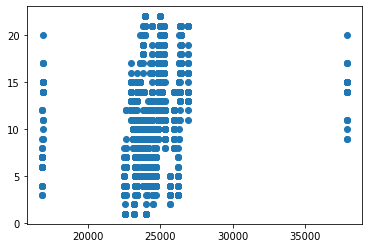

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_data = dfmain['pit_ms']
Y_data = dfmain['position']
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2)
print(X_train)
print(Y_train)

m1 = LinearRegression()

X_train = X_train.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)

X_test = X_test.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

m1.fit(X_train, Y_train)

y_pred = m1.predict(X_test)

# plt.plot(X_data, Y_data)

print("Coefficients: \n", m1.coef_)

print('Intercept: \n', m1.intercept_)

print('R-squared: %.2f' % r2_score(Y_test, y_pred))

print('mean squared training error: %.2f'% mean_squared_error(Y_train[0:477], y_pred, squared= True))

print('mean squared testing error: %.2f'% mean_squared_error(Y_test[0:477], y_pred, squared= True))

plt.scatter(X_data, Y_data)






From the scatter plot, we could see that the average pit stop time for most teams were around 22500 and 27500 miliseceonds, with outliers of some extremely fast pitstop times and occasional long pit stop time.

When it comes to placement of teams depenedent on pitstop times, we can see that top teams placed around the average.